In [77]:
import io
#
#index ---- index id of this paper
#* ---- paper title
#@ ---- authors (separated by semicolons)
#t ---- year
#c ---- publication venue
#% ---- the id of references of this paper (there are multiple lines, with each indicating a reference)
#! ---- abstract
index_list = []
title_list = []
author_list = []
year_list = []
publication_venue_list = []
reference_list = {}
title_list_dict = {}
def parse():
    

    with open('/Users/mallika2493/Downloads/AP_train.txt', 'r', encoding="utf8") as f:
        readFile = f.readlines()
        
        for line in readFile:
            if line is not None:

                new_line = line.split(' ')

                if new_line[0] == "#index":
                    index = line.strip('#index').strip()
                    index_list.append(index)
                    


                if line.startswith('#*'):
                    title_list.append(line.strip('#*').strip())
                    title_list_dict[index] = line.strip('#*').strip()


                if new_line[0] == '#@':
                    if new_line[0]!='':
                        authors = line.strip('#@').strip().split(';')
                        author_list.append(authors)

                if new_line[0] == '#t':
                    
                        year_list.append(line.strip('#t').strip())

                if new_line[0] == '#c':

                        publication_venue_list.append(line.strip('#c').strip())

                if new_line[0] == '#%':
                    reference_list.setdefault(index, []).append(line.strip('#%').strip())




    print(len(index_list))
    print(len(title_list))
    print(len(author_list))
    print(len(year_list))
    print(len(publication_venue_list))
    print(len(reference_list))






In [78]:
parse()

1976815
1976815
1976815
1976815
1976815
797454


In [79]:
import itertools
merged = list(itertools.chain.from_iterable(author_list))
print(len(set(merged)))

1483290


In [80]:
print(len(set(publication_venue_list)))

255686


In [81]:
print(len(set(index_list)))

1976815


In [82]:
unique_citations = []
for k in reference_list:
      for item in reference_list[k]: 
            unique_citations.append(item)
print(len(unique_citations))

7250326


In [84]:
#---------------C----------------#

In [85]:
author_publication = {}
index=1
for sublist_authors in author_list:
    for author in sublist_authors:
        author_publication.setdefault(author, []).append(index)
        
    index=index+1




In [86]:
author_publication_count = {}

for author in author_publication:
    if author == '':
        continue
    author_publication_count[author] = len(author_publication[author])
    
    
    

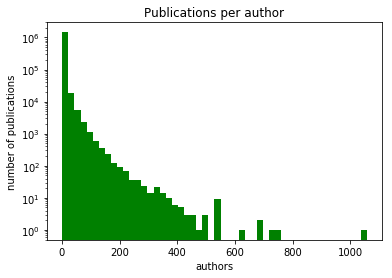

In [87]:
import matplotlib.pyplot as plt

plt.hist(list(author_publication_count.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('authors')
plt.ylabel('number of publications')
plt.title('Publications per author')
plt.show()

In [88]:
#----------------D---------------#

In [89]:
import numpy
import pandas as pd
l = list(author_publication_count.values())
df = pd.DataFrame(numpy.array(l), columns = list("a"))
print(df.describe())

                  a
count  1.483289e+06
mean   3.281675e+00
std    8.836385e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    2.000000e+00
max    1.056000e+03


In [90]:
#---------------E----------------#

In [91]:
venue_publication = {}
index=1
for i in range(0,len(index_list)):
    venue_publication.setdefault(publication_venue_list[i], []).append(index_list[i])
        

venue_publication_count = {}

for venue in venue_publication:
    if venue == '':
        continue
    venue_publication_count[venue] = len(venue_publication[venue])
    
    
    

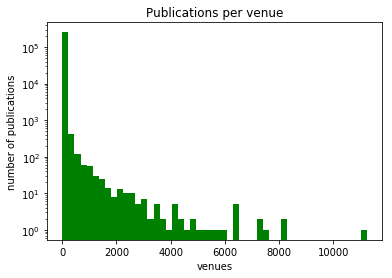

In [92]:
import matplotlib.pyplot as plt

plt.hist(list(venue_publication_count.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('venues')
plt.ylabel('number of publications')
plt.title('Publications per venue')
plt.show()

In [93]:
l = list(venue_publication_count.values())
df = pd.DataFrame(numpy.array(l), columns = list("a"))
print(df.describe())

                   a
count  255685.000000
mean        7.730966
std        83.381071
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max     11227.000000


In [94]:
print(max(venue_publication_count, key=lambda k: venue_publication_count[k]))

IEEE Transactions on Information Theory


In [95]:
#---------------F----------------#

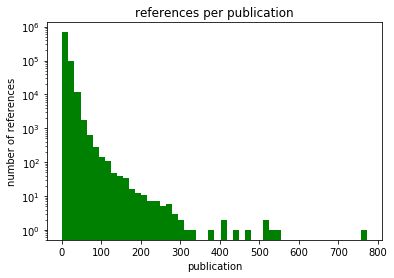

In [96]:
reference_publication_count = {}
for reference in reference_list:
    if reference == '':
        continue
    reference_publication_count[reference] = len(reference_list[reference])

import matplotlib.pyplot as plt

plt.hist(list(reference_publication_count.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('publication')
plt.ylabel('number of references')
plt.title('references per publication')
plt.show()    

In [97]:
from collections import Counter
import itertools
count = {}
citations = list(itertools.chain.from_iterable(list(reference_list.values())))
count = Counter(citations)






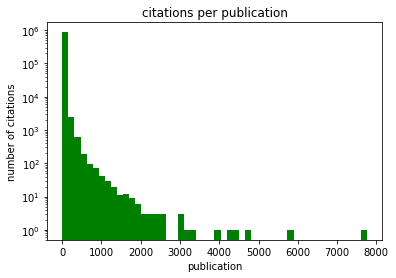

In [98]:
import matplotlib.pyplot as plt

plt.hist(list(count.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('publication')
plt.ylabel('number of citations')
plt.title('citations per publication')
plt.show()

In [99]:
print(max(reference_publication_count,key=lambda k: reference_publication_count[k]))

719353


In [113]:
print("publication with largest number of references")
print(title_list_dict['719353'])
reference_publication_count['719353']

publication with largest number of references
Cited References


772

In [114]:
print(max(count,key=lambda k: count[k]))

408396


In [115]:
print("publication with larget number of citations")
print(title_list_dict['408396'])

publication with larget number of citations
Computers and Intractability: A Guide to the Theory of NP-Completeness


In [106]:
count['408396']

7753

In [108]:
#---------------G----------------#

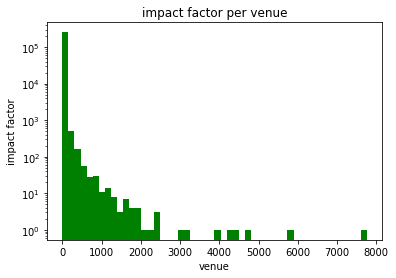

In [109]:
impact_factor_dict = {}
for venue in venue_publication:
    if venue == '':
        continue
    pub_list = venue_publication[venue]
    
    
    sum=0
    for publication in pub_list:
        sum=sum+count[str(publication)]
    impact_factor_dict[venue]=sum/venue_publication_count[venue]
    
plt.hist(list(impact_factor_dict.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('venue')
plt.ylabel('impact factor')
plt.title('impact factor per venue')
plt.show()
    
    

In [110]:
#---------------H----------------#

In [111]:
print(max(impact_factor_dict,key=lambda k: impact_factor_dict[k]))

Computers and Intractability: A Guide to the Theory of NP-Completeness


In [112]:
print(impact_factor_dict['Computers and Intractability: A Guide to the Theory of NP-Completeness'])

7753.0


In [ ]:
#---------------I----------------#

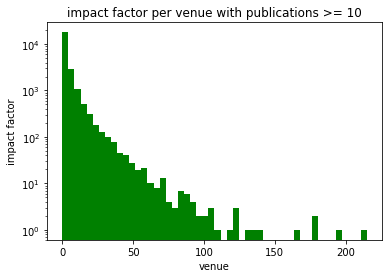

In [116]:
impact_factor_dict_pub_more_10 = {}
for venue in venue_publication:
    if venue == '' or venue_publication_count[venue]<10:
        
        continue
    pub_list = venue_publication[venue]
    sum=0
    for publication in pub_list:
        sum=sum+count[str(publication)]
    impact_factor_dict_pub_more_10[venue]=sum/venue_publication_count[venue]
    
plt.hist(list(impact_factor_dict_pub_more_10.values()),bins=50, color='g')
plt.yscale('log')
plt.xlabel('venue')
plt.ylabel('impact factor')
plt.title('impact factor per venue with publications >= 10')
plt.show()

In [117]:
venue_max=max(impact_factor_dict_pub_more_10, key=impact_factor_dict_pub_more_10.get)
print(venue_max)
citation_list_venue_max=[]
pub_list=venue_publication[venue_max] 
for publication in pub_list:
    if count[str(publication)]>10:
        citation_list_venue_max.append(count[str(publication)])
print(citation_list_venue_max)    
print(impact_factor_dict_pub_more_10[venue_max])

df = pd.DataFrame(numpy.array(citation_list_venue_max), columns = list("a"))
print(df.describe())
    
    

Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
[167, 115, 48, 11, 138, 50, 11, 112, 103, 27, 2140, 1609, 87, 22, 67, 19, 28, 22, 21, 42, 46, 46]
214.82608695652175
                 a
count    22.000000
mean    224.136364
std     542.171937
min      11.000000
25%      23.250000
50%      47.000000
75%     109.750000
max    2140.000000


In [118]:
#---------------J----------------#

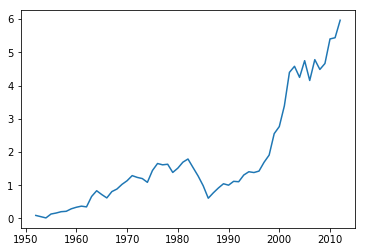

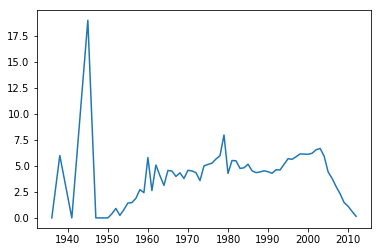

In [119]:
year_publication = {}
references_per_year = {}
citations_per_year = {}
avg_references = {}
avg_citations = {}
index=1
i = 0
for i in range(0,len(index_list)):
    if year_list[i]!='':
        year_publication.setdefault(int(year_list[i]),[]).append(str(index_list[i]))
    index=index+1
    

for year,pub_list in year_publication.items():
    num_citations=0
    for each_pub in pub_list:
        
        if each_pub in reference_list: 
            references = reference_list[each_pub]
            for reference in references:
                references_per_year.setdefault(year,[]).append(reference)
        
        if each_pub in count:
            num_citations=num_citations+count[each_pub]
        citations_per_year[year]= num_citations    
                

for year,reference_l in references_per_year.items():
    avg_references[year] = len(reference_l)/len(year_publication[year])

for year in citations_per_year:
    avg_citations[year] = citations_per_year[year]/len(year_publication[year])

lists = sorted(avg_references.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

lists = sorted(avg_citations.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()
            
    
        
    

In [ ]:
#The number of references increased with time however the citations were increasing but also saw a dip with time.
#We can also observe that there is pike in the number of citations between 1940 and 1950